In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import numpy as np
import csv
import re
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import statsmodels.api as sm



C:\Users\DaBoss\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import os
os.rename('C:/Users/DaBoss/Desktop/pilot2/no_end','C:/Users/DaBoss/Desktop/pilot2/no_end.csv’)

SyntaxError: EOL while scanning string literal (<ipython-input-2-e109ca54df2d>, line 2)

create a data frame from all of the numerical data in the csv by spliting by exclamation points and only selects rows from csv tyhat are more than 100 character because all of the levels data are extremely long.


In [3]:
lesstemplist = []

for filename in glob.iglob("C:/Users/DaBoss/Desktop/pilot2/*.csv*"):
    temp = open(filename, 'r')
    temp2 = temp.read().splitlines()
    for i in range(len(temp2)):
        if len(temp2[i])>1000:
            vabs = temp2[i].split('!')
            lesstemplist.append(vabs)
df = pd.DataFrame(lesstemplist,columns=['accratio', 'Xcord', 'Ycord','Timemousecords','timestimsarrive','difficultylevel','stimsclicked','stimsshown'])



here we add in ids by creating a new dataframe for ids. 
sometimes id and the final questionairre answers get reversed in order so we perform a swap if the the last element is longer than the second to last element
we also create the id anon for any rows csv that down have an id becuase the partivciapnt did not reach the end of the experiment.

In [4]:

#addinIDs

ids = []
for filename in glob.iglob("C:/Users/DaBoss/Desktop/pilot2/*.csv*"):
    temp = open(filename, 'r')
    temp2 = temp.read().splitlines()
    if len(temp2[-1]) > len(temp2[-2]):
        #here were swaping if the final questionairre and id are in the wrong order
        x = temp2[-1]
        temp2[-1] = temp2[-2]
        temp2[-2] = temp2[-1]
        for i in range(len(temp2)):
            if len(temp2[i])>1000:
                if len(temp2[-1]) > 25:
                    ids.append("anon")
                else:
                    ids.append(temp2[-1])
    else:
        for i in range(len(temp2)):
            if len(temp2[i])>1000:
                if len(temp2[-1]) > 25:
                    ids.append("anon")
                else:
                    ids.append(temp2[-1])
se = pd.Series(ids)
df['IDs'] = se.values


Here we add in the questionairre data the same way as we have with everything else. the questionairre data comes in a bit messy so we also trim of some of the exra bits like the equals signs used as delimiters.

In [5]:

##add in Questionairre data

expQs = []
for filename in glob.iglob("C:/Users/DaBoss/Desktop/pilot2/*.csv*"):
    temp = open(filename, 'r')
    temp2 = temp.read().splitlines()
    #numlines += len(temp2)
    templist = []
    for i in range(len(temp2)):
        if (len(temp2[i])<50) & (len(temp2[i])>15):
            vabs = temp2[i].split(',')
            newvabs = [x[-1] for x in vabs]
            finalvabs = newvabs[:3]
            expQs.append(finalvabs)
df2= pd.DataFrame(expQs,columns=['Q1','Q2','Q3'])

df3 = pd.concat([df, df2], axis=1)

##blank out unfinished Questionairres

df4 = df3
mask = df4.Q3 == '='
column_name1 = 'Q3'
df4.loc[mask, ['Q1','Q2','Q3']] = 0

In [6]:
#df.applymap(lambda x: x.replace('"', ''))

for i, col in enumerate(df.columns):
    df4.iloc[:, i] = df.iloc[:, i].str.replace('"', '')
df4

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,IDs,Q1,Q2,Q3
0,0.3389830508474576,"362,362,361,361,358,358,358,358,362,366,372,37...","621,622,624,626,630,634,638,639,630,620,602,58...","1521001302412,1521001302588,1521001302603,1521...","1521001302411,1521001303063,1521001303716,1521...",3,20,59,aBEBH29T9AnM,3,2,3
1,0.2597402597402597,"362,362,361,361,358,358,358,358,362,366,372,37...","621,622,624,626,630,634,638,639,630,620,602,58...","1521001302412,1521001302588,1521001302603,1521...","1521001302411,1521001303063,1521001303716,1521...",4,20,77,aBEBH29T9AnM,4,4,2
2,0.2777777777777778,"362,362,361,361,358,358,358,358,362,366,372,37...","621,622,624,626,630,634,638,639,630,620,602,58...","1521001302412,1521001302588,1521001302603,1521...","1521001302411,1521001303063,1521001303716,1521...",5,20,72,aBEBH29T9AnM,4,4,1
3,0.32786885245901637,"362,362,361,361,358,358,358,358,362,366,372,37...","621,622,624,626,630,634,638,639,630,620,602,58...","1521001302412,1521001302588,1521001302603,1521...","1521001302411,1521001303063,1521001303716,1521...",6,20,61,aBEBH29T9AnM,4,4,2
4,0.18823529411764706,"362,362,361,361,358,358,358,358,362,366,372,37...","621,622,624,626,630,634,638,639,630,620,602,58...","1521001302412,1521001302588,1521001302603,1521...","1521001302411,1521001303063,1521001303716,1521...",7,16,85,aBEBH29T9AnM,3,4,2
5,0.18181818181818182,"362,362,361,361,358,358,358,358,362,366,372,37...","621,622,624,626,630,634,638,639,630,620,602,58...","1521001302412,1521001302588,1521001302603,1521...","1521001302411,1521001303063,1521001303716,1521...",8,16,88,aBEBH29T9AnM,3,3,1
6,0.2898550724637681,"362,362,361,361,358,358,358,358,362,366,372,37...","621,622,624,626,630,634,638,639,630,620,602,58...","1521001302412,1521001302588,1521001302603,1521...","1521001302411,1521001303063,1521001303716,1521...",9,20,69,aBEBH29T9AnM,2,3,1
7,0.2597402597402597,"362,362,361,361,358,358,358,358,362,366,372,37...","621,622,624,626,630,634,638,639,630,620,602,58...","1521001302412,1521001302588,1521001302603,1521...","1521001302411,1521001303063,1521001303716,1521...",10,20,77,aBEBH29T9AnM,1,3,1
8,0.24096385542168675,"365,365,365,368,370,373,380,389,399,416,428,44...","633,630,622,617,611,603,589,573,557,536,523,50...","1520961642908,1520961642917,1520961642948,1520...","1520961642473,1520961643122,1520961644191,1520...",3,20,83,MWCfkBGdAQB3,4,5,4
9,0.20454545454545456,"365,365,365,368,370,373,380,389,399,416,428,44...","633,630,622,617,611,603,589,573,557,536,523,50...","1520961642908,1520961642917,1520961642948,1520...","1520961642473,1520961643122,1520961644191,1520...",4,18,88,MWCfkBGdAQB3,5,5,3


this is for printing jeffs student who didnt match with propsed codes.

In [7]:
import re

idlist = df4['IDs'].tolist()

regex = r">([a-zA-Z0-9]+)<"

jefflist= []
jefflistname = []

for subdir, dirs, files in os.walk("C:/Users/DaBoss/Desktop/submissions(11)"):
    for file in files:
        if file.endswith(".html"):
            file_path = "C:/Users/DaBoss/Desktop/submissions(11)/"+file
            #print("--->",file_path,"<---")
            with open(file_path, 'r') as textfile:
                text = textfile.read()
                match =  re.search(regex,text)
                if(match is not None):
                    #print(match[1])
                    jefflistname.append(file_path)
                    jefflist.append(match[1])


justidlist = []
justidlist.append(idlist[0])
for i in range (1,len(idlist)):
    if idlist[i] != idlist[i - 1]:
        justidlist.append(idlist[i])

        
badids = [x for x in jefflist if x not in justidlist]
idDict = dict(zip(jefflist, jefflistname))
for i in range(len(badids)):
    print(idDict[badids[i]])        

C:/Users/DaBoss/Desktop/submissions(11)/barnardfaustina_2749_text.html
C:/Users/DaBoss/Desktop/submissions(11)/cerenomichaela_11877_text.html
C:/Users/DaBoss/Desktop/submissions(11)/chuatroi_2174_text.html
C:/Users/DaBoss/Desktop/submissions(11)/degnmikayla_2193_text.html
C:/Users/DaBoss/Desktop/submissions(11)/delrealalondra_10713_text.html
C:/Users/DaBoss/Desktop/submissions(11)/dukimberly_24278_text.html
C:/Users/DaBoss/Desktop/submissions(11)/garciasachiko_4184_text.html
C:/Users/DaBoss/Desktop/submissions(11)/gonzalezjennifer_23055_text.html
C:/Users/DaBoss/Desktop/submissions(11)/harrisalivia_29213_text.html
C:/Users/DaBoss/Desktop/submissions(11)/hermosillalillyanne_4495_text.html
C:/Users/DaBoss/Desktop/submissions(11)/jonescrystal_4729_text.html
C:/Users/DaBoss/Desktop/submissions(11)/kwongkenneth_4887_text.html
C:/Users/DaBoss/Desktop/submissions(11)/lamkhanhlinh_10890_text.html
C:/Users/DaBoss/Desktop/submissions(11)/leiskechad_28163_text.html
C:/Users/DaBoss/Desktop/submiss

In [8]:
## here we start actually runing analysis

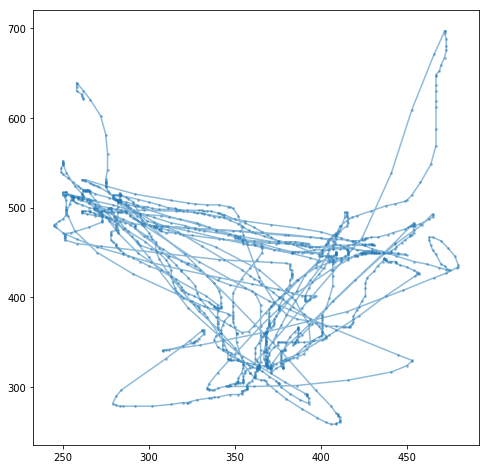

In [9]:
#scatter plot
#next goal, try to add color to dots that changes over time so you can see which paterns are from beginning and whicxh are from end

#currently prints xs and ys from row zero 

xs = [int(i)-100 for i in df4.at[0,'Xcord'].split(',')]  
ys = [int(i) for i in df4.at[0,'Ycord'].split(',')]  

plt.figure(1,figsize=(8,8))
    
    
#im = plt.imread("C:/Users/DaBoss/DocumentsGitHub/clickdamole/images/moles.png")
#implot = plt.imshow(im, alpha=.5)

plt.plot(xs, ys, alpha=.5)
plt.scatter(xs, ys, alpha=.4, s=3)

In [10]:
#simple regression

tempdf = df4
temp2df = tempdf.drop(columns=['Xcord','Ycord', 'Timemousecords', 'timestimsarrive','IDs'])
allnumdf = temp2df.convert_objects(convert_numeric=True)

target = pd.DataFrame(allnumdf.Q2, columns=['Q2'])
X=allnumdf['accratio']
x=X.tolist()
Y=target['Q2']
y=Y.tolist()
model = sm.OLS(y, x).fit()
model.summary()

C:\Users\DaBoss\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     161.6
Date:                Fri, 23 Mar 2018   Prob (F-statistic):           3.70e-26
Time:                        01:46:33   Log-Likelihood:                -389.95
No. Observations:                 164   AIC:                             781.9
Df Residuals:                     163   BIC:                             785.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.2589      0.650     12.710      0.000       6.976       9.542
==============================================================================
Omnibus:                       19.934   Durbin-Watson:                   0.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.846
Skew:                          -0.353   Prob(JB):                       0.0120
Kurtosis:                       2.108   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

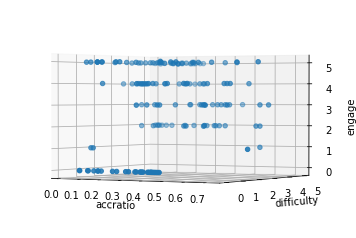

In [11]:
#for color but havent done this yet
engagement = allnumdf['Q2'].tolist()
difficulty = allnumdf['Q1'].tolist()
accuracy = allnumdf['accratio'].tolist()
threedee = plt.figure().gca(projection='3d')
threedee.scatter(accuracy, difficulty, engagement)
threedee.set_xlabel('accratio')
threedee.set_zlabel('engage')
threedee.set_ylabel('difficulty')
threedee.view_init(azim=0)
threedee.view_init(elev=1)

plt.show()


In [12]:
##trying to fit m,ultiple regression
import statsmodels.formula.api as smf

mX = allnumdf[['Q1', 'accratio']]

my = allnumdf['Q2']
## fit a OLS model with intercept on TV and Radio

mX = sm.add_constant(X)

Mest = sm.OLS(my, mX).fit()
Mest = smf.ols(formula='Q2 ~ accratio * Q1', data=allnumdf).fit()

Mest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q2   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     32.43
Date:                Fri, 23 Mar 2018   Prob (F-statistic):           1.98e-16
Time:                        01:46:40   Log-Likelihood:                -286.66
No. Observations:                 164   AIC:                             581.3
Df Residuals:                     160   BIC:                             593.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5496      0.449      5.673      0.000       1.662       3.437
accratio       -4.1667      1.544     -2.698      0.008      -7.217      -1.117
Q1              0.5300      0.147      3.615      0.000       0.240       0.820
accratio:Q1     0.4648      0.495      0.940      0.349      -0.512       1.441
==============================================================================
Omnibus:                       15.288   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.348
Skew:                           0.068   Prob(JB):                       0.0690
Kurtosis:                       2.126   Cond. No.                         51.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""